## **LIBRARIES INSTALLATION**

In [ ]:
!sudo pip install PyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install h5pyViewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.0 MB/s 
     |████████████████████████████████| 74 kB 2.7 MB/s 
     |████████████████████████████████| 74 kB 2.8 MB/s 
     |████████████████████████████████| 74 kB 1.5 MB/s 
     |████████████████████████████████| 74 kB 1.7 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 73 kB 1.5 MB/s 
     |████████████████████████████████| 73 kB 677 kB/s 
     |████████████████████████████████| 73 kB 1.4 MB/s 
     |████████████████████████████████| 75 kB 3.4 MB/s 
     |████████████████████████████████| 68 kB 5.5 MB/s 
     |████████████████████████████████| 68 kB 6.2 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 66 kB 5.5 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 66 kB 5.0 MB/s 
ERROR

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


## IMPORTANT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from tensorflow.keras.utils import plot_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

## CREATE DIRECTORY

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


## DOWNLOAD KAGGLE.JSON FROM KAGGLE ACCOUNT

In [ ]:
! cp kaggle.json ~/.kaggle/

SET PERMISSION

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

## COPY THE API FOR DOWNLOADING DATASET

In [ ]:
!kaggle datasets download -d kaitavmehta/facial-droop-and-facial-paralysis-image

 94% 365M/387M [00:03<00:00, 92.6MB/s]
100% 387M/387M [00:03<00:00, 113MB/s] 


In [ ]:
! unzip -qq facial-dataset.zip

## DATA COLLECTION

In [ ]:
Fire_Dataset_Path = Path("/content/face_dataset")

In [ ]:
PNG_Path = list(Face_Dataset_Path.glob(r"*/*.png"))

In [ ]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

## DATA AUGMENTATION

In [ ]:
print("paralysis: ", PNG_Labels.count("paralysis_images"))
print("NO_paralysis: ", PNG_Labels.count("non_paralysis_images"))

FIRE:  755
NO_FIRE:  244


In [ ]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [ ]:
print(PNG_Path_Series)

0         /content/fire_dataset/fire_images/fire.189.png
1         /content/fire_dataset/fire_images/fire.753.png
2         /content/fire_dataset/fire_images/fire.653.png
3         /content/fire_dataset/fire_images/fire.323.png
4         /content/fire_dataset/fire_images/fire.619.png
                             ...                        
994    /content/fire_dataset/non_fire_images/non_fire...
995    /content/fire_dataset/non_fire_images/non_fire...
996    /content/fire_dataset/non_fire_images/non_fire...
997    /content/fire_dataset/non_fire_images/non_fire...
998    /content/fire_dataset/non_fire_images/non_fire...
Name: PNG, Length: 999, dtype: object


In [ ]:
print(PNG_Labels_Series)

0          fire_images
1          fire_images
2          fire_images
3          fire_images
4          fire_images
            ...       
994    non_fire_images
995    non_fire_images
996    non_fire_images
997    non_fire_images
998    non_fire_images
Name: CATEGORY, Length: 999, dtype: object


In [ ]:
PNG_Labels_Series.replace({"non_fire_images":"NO_FIRE","fire_images":"FIRE"},inplace=True)

In [ ]:
print(PNG_Labels_Series)

0         FIRE
1         FIRE
2         FIRE
3         FIRE
4         FIRE
        ...   
994    NO_FIRE
995    NO_FIRE
996    NO_FIRE
997    NO_FIRE
998    NO_FIRE
Name: CATEGORY, Length: 999, dtype: object


## EDA

In [ ]:
Main_Train_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [ ]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0       /content/fire_dataset/fire_images/fire.189.png     FIRE
1       /content/fire_dataset/fire_images/fire.753.png     FIRE
2       /content/fire_dataset/fire_images/fire.653.png     FIRE
3       /content/fire_dataset/fire_images/fire.323.png     FIRE
4       /content/fire_dataset/fire_images/fire.619.png     FIRE
..                                                 ...      ...
993  /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE
994  /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE
995  /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE
996  /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE
997  /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE

[998 rows x 2 columns]


In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0    /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE
1       /content/fire_dataset/fire_images/fire.397.png     FIRE
2       /content/fire_dataset/fire_images/fire.261.png     FIRE
3       /content/fire_dataset/fire_images/fire.306.png     FIRE
4       /content/fire_dataset/fire_images/fire.575.png     FIRE
..                                                 ...      ...
993      /content/fire_dataset/fire_images/fire.23.png     FIRE
994      /content/fire_dataset/fire_images/fire.77.png     FIRE
995     /content/fire_dataset/fire_images/fire.215.png     FIRE
996     /content/fire_dataset/fire_images/fire.616.png     FIRE
997     /content/fire_dataset/fire_images/fire.207.png     FIRE

[998 rows x 2 columns]


In [ ]:
print(Main_Train_Data["PNG"][2])
print(Main_Train_Data["CATEGORY"][2])
print(Main_Train_Data["PNG"][200])
print(Main_Train_Data["CATEGORY"][200])
print(Main_Train_Data["PNG"][45])
print(Main_Train_Data["CATEGORY"][45])
print(Main_Train_Data["PNG"][852])
print(Main_Train_Data["CATEGORY"][852])

/content/fire_dataset/fire_images/fire.261.png
FIRE
/content/fire_dataset/fire_images/fire.436.png
FIRE
/content/fire_dataset/fire_images/fire.674.png
FIRE
/content/fire_dataset/fire_images/fire.409.png
FIRE


In [ ]:
remove_PNG = '../input/fire-dataset/fire_dataset/non_fire_images/non_fire.189.png'
Main_Train_Data = Main_Train_Data.loc[~(Main_Train_Data.loc[:,'PNG'] == remove_PNG),:]

In [ ]:
print(Main_Train_Data.loc[Main_Train_Data.loc[:,'PNG'] == remove_PNG,:])

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [ ]:
print(Main_Train_Data.head(-1))

                                                   PNG CATEGORY
0    /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE
1       /content/fire_dataset/fire_images/fire.397.png     FIRE
2       /content/fire_dataset/fire_images/fire.261.png     FIRE
3       /content/fire_dataset/fire_images/fire.306.png     FIRE
4       /content/fire_dataset/fire_images/fire.575.png     FIRE
..                                                 ...      ...
993      /content/fire_dataset/fire_images/fire.23.png     FIRE
994      /content/fire_dataset/fire_images/fire.77.png     FIRE
995     /content/fire_dataset/fire_images/fire.215.png     FIRE
996     /content/fire_dataset/fire_images/fire.616.png     FIRE
997     /content/fire_dataset/fire_images/fire.207.png     FIRE

[998 rows x 2 columns]


In [ ]:
plt.style.use("dark_background")

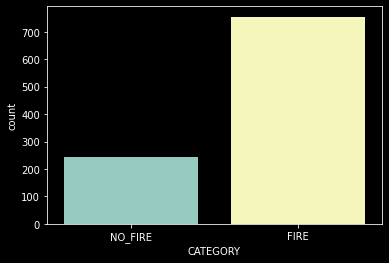

In [ ]:
sns.countplot(Main_Train_Data["CATEGORY"])
plt.show()

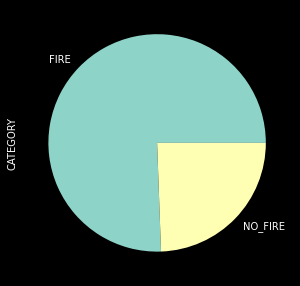

In [ ]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

Text(0.5, 1.0, 'NO_FIRE')

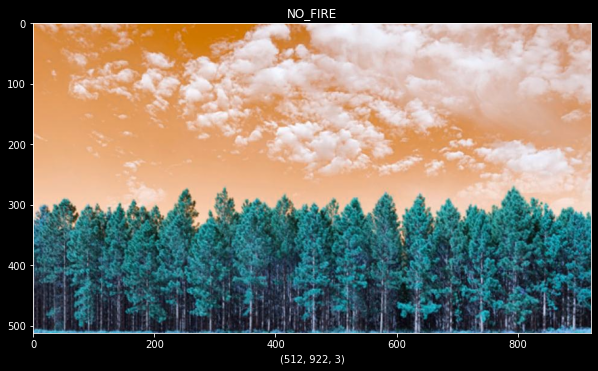

In [ ]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][0])

Text(0.5, 1.0, 'FIRE')

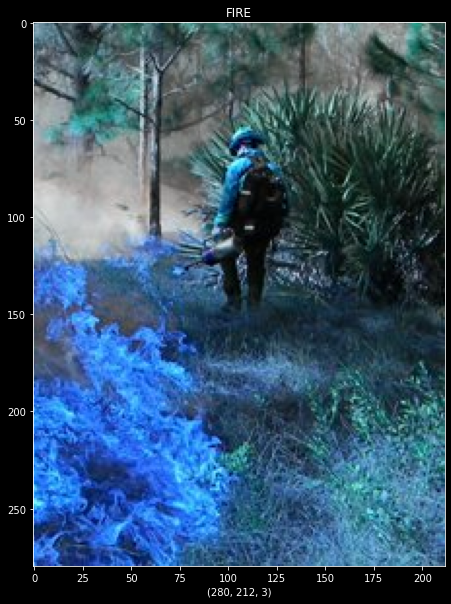

In [ ]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][993])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][993])

Text(0.5, 1.0, 'FIRE')

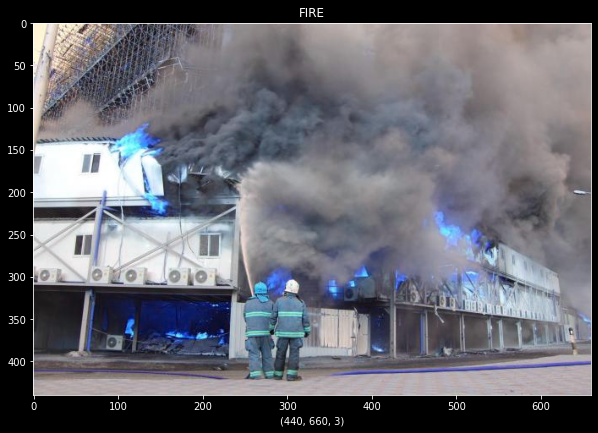

In [ ]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][20])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][20])

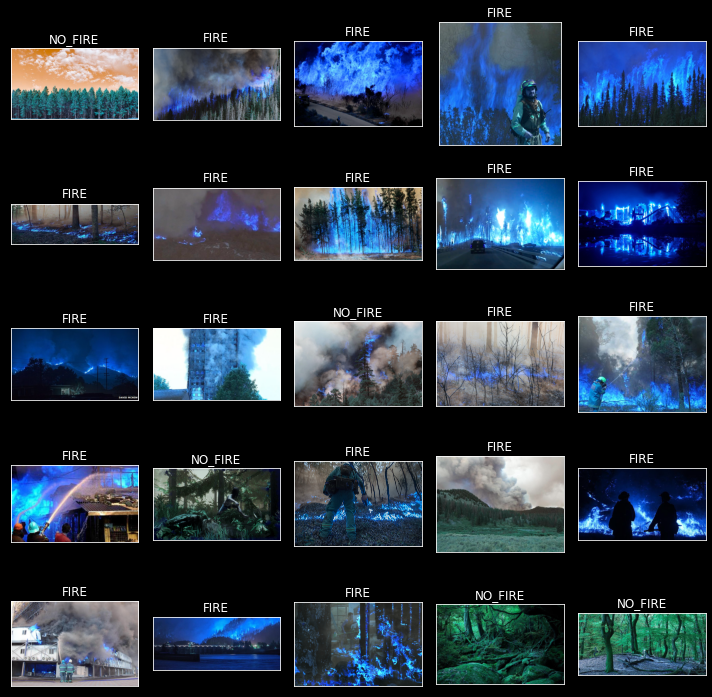

In [ ]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Main_Train_Data["PNG"][i]))
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

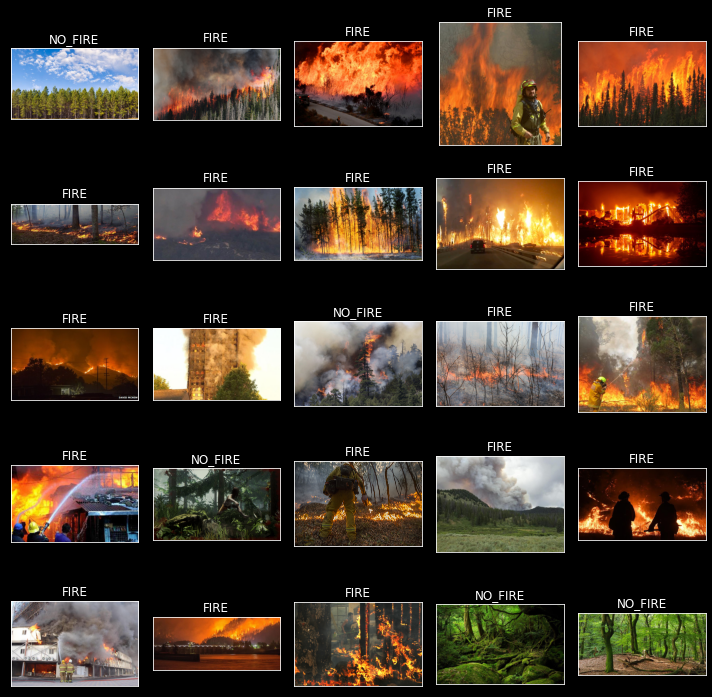

In [ ]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    x = cv2.imread(Main_Train_Data["PNG"][i])
    x = cv2.cvtColor(x,cv2.COLOR_RGB2BGR)
    ax.imshow(x)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()


## LOADERS AND RANDOMISATION

In [ ]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [ ]:
Test_Generator = ImageDataGenerator(rescale=1./255)

## SPLITTING TRAIN AND TEST

In [ ]:
Train_Data,Test_Data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (899, 2)
TEST SHAPE:  (100, 2)


In [ ]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                                   PNG CATEGORY
599     /content/fire_dataset/fire_images/fire.399.png     FIRE
432      /content/fire_dataset/fire_images/fire.89.png     FIRE
221  /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE
973     /content/fire_dataset/fire_images/fire.251.png     FIRE
525     /content/fire_dataset/fire_images/fire.357.png     FIRE
..                                                 ...      ...
71      /content/fire_dataset/fire_images/fire.277.png     FIRE
106     /content/fire_dataset/fire_images/fire.666.png     FIRE
270  /content/fire_dataset/non_fire_images/non_fire...  NO_FIRE
860      /content/fire_dataset/fire_images/fire.86.png     FIRE
435     /content/fire_dataset/fire_images/fire.126.png     FIRE

[898 rows x 2 columns]
--------------------------------------------------------------------------------
                                                   PNG CATEGORY
453     /content/fire_dataset/fire_images/fire.415.png     FIRE

In [ ]:
print(Test_Data["CATEGORY"].value_counts())

FIRE       69
NO_FIRE    31
Name: CATEGORY, dtype: int64


In [ ]:
encode = LabelEncoder()

In [ ]:
For_Prediction_Class = encode.fit_transform(Test_Data["CATEGORY"])

## POST Generator Applied Image Look Like

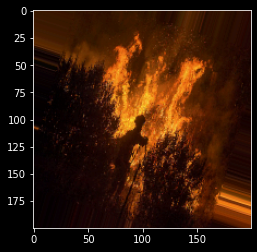

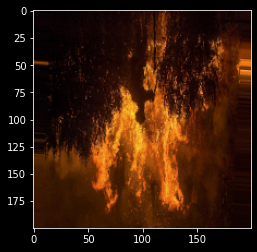

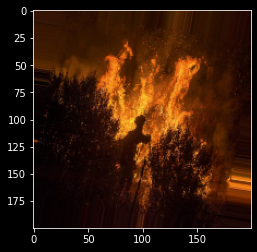

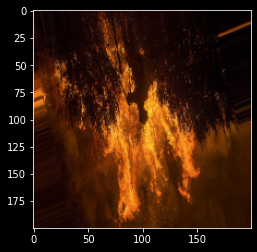

In [ ]:
example_Image = Train_Data["PNG"][99]
Load_Image = image.load_img(example_Image,target_size=(200,200))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [ ]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="training")

Found 810 validated image filenames belonging to 2 classes.


In [ ]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="validation")

Found 89 validated image filenames belonging to 2 classes.


In [ ]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="PNG",
                                                 y_col="CATEGORY",
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=32)

Found 100 validated image filenames belonging to 2 classes.


In [ ]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [ ]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [ ]:
for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [ ]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 1, 0, 0, 1]
(256, 256, 3)
------------------------------------------------------------
VALIDATION: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 0, 1, 0, 0]
(256, 256, 3)
------------------------------------------------------------
TEST: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 1, 0, 0, 1]
(256, 256, 3)


## CREATING NEURAL NETWORK - CNN

In [ ]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",
                 input_shape=(256,256,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(128,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [ ]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

In [ ]:
Model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                            callbacks=Call_Back,
                      epochs=50)

Epoch 1/50
26/26 [==============================] - 165s 6s/step - loss: 16.3761 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
26/26 [==============================] - 158s 6s/step - loss: 0.6998 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
26/26 [==============================] - 158s 6s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
26/26 [==============================] - 160s 6s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
26/26 [==============================] - 158s 6s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
26/26 [==============================] - 157s 6s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
26/26 [==============================] - 158s 6s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/50
2

In [ ]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0

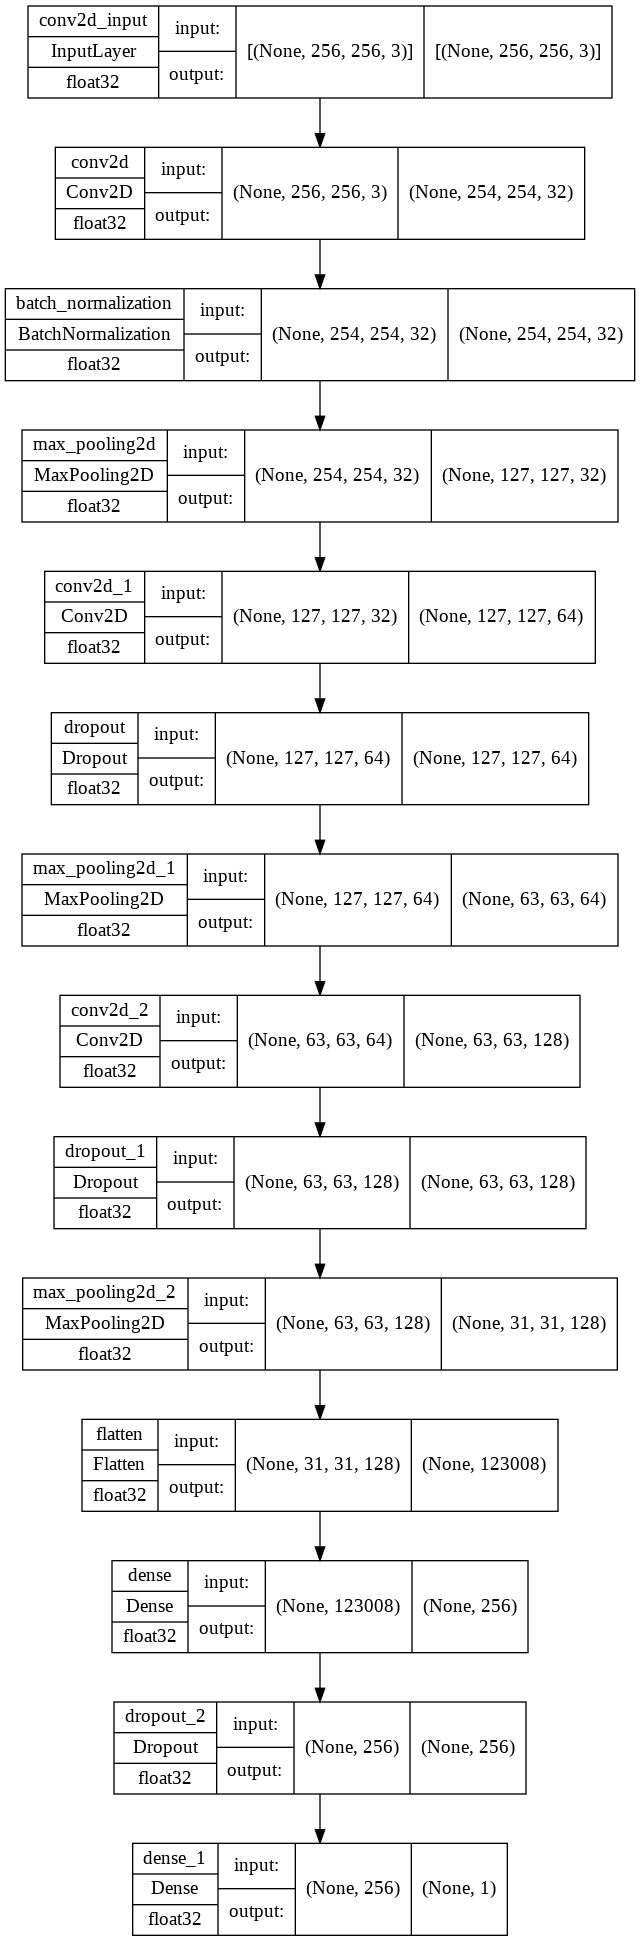

In [ ]:
plot_model(Model,to_file="Model_One.png",show_layer_names=True,show_dtype=True,show_shapes=True)

In [ ]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

4/4 [==============================] - 7s 1s/step - loss: 0.6931 - accuracy: 0.5000
LOSS:  0.6931
ACCURACY:  0.50


No handles with labels found to put in legend.


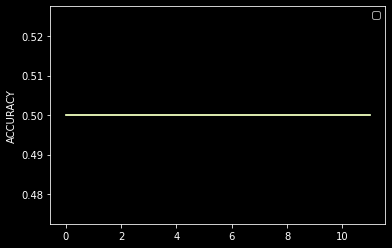

In [ ]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


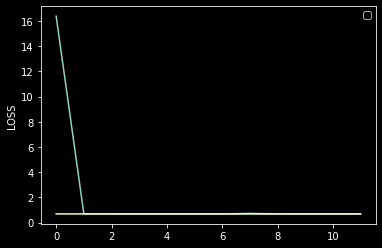

In [ ]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

No handles with labels found to put in legend.


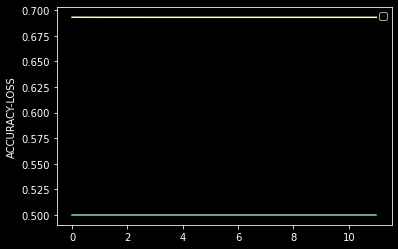

In [ ]:
plt.plot(CNN_Model.history["val_accuracy"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("ACCURACY-LOSS")
plt.legend()
plt.show()

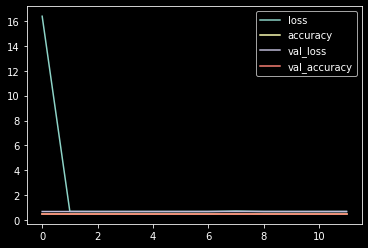

In [ ]:
Dict_Summary_One = pd.DataFrame(CNN_Model.history)
Dict_Summary_One.plot()

In [ ]:
Prediction_One = Model.predict(Test_IMG_Set)
Prediction_One = Prediction_One.argmax(axis=-1)

In [ ]:
print(Prediction_One)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
Predict_Class = (Model.predict(Test_IMG_Set)> -1).astype("int32")

In [ ]:
print(Predict_Class)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


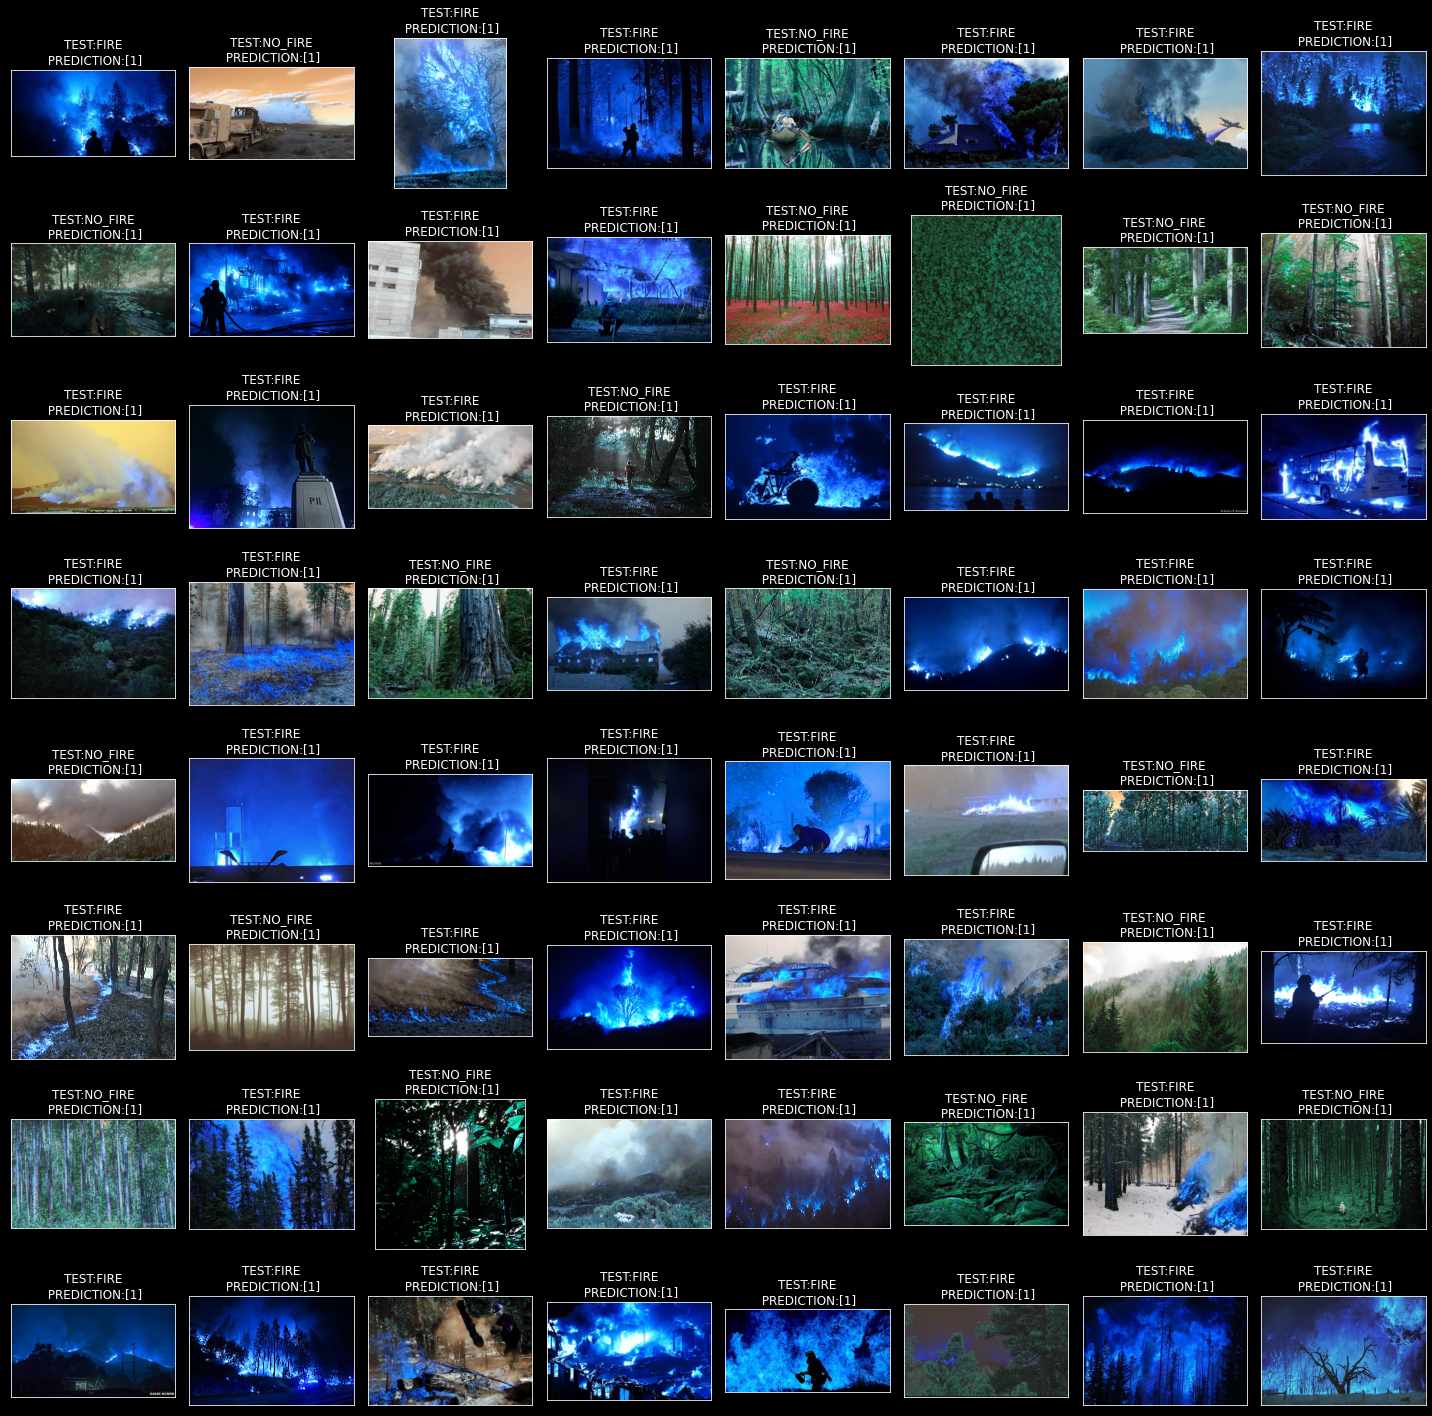

In [ ]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Test_Data["PNG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Predict_Class[i]}")
plt.tight_layout()
plt.show()

## CLASSIFICATION AND ACCURACY

In [ ]:
print(confusion_matrix(For_Prediction_Class,Predict_Class))

[[ 0 69]
 [ 0 31]]


In [ ]:
print(classification_report(For_Prediction_Class,Predict_Class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.31      1.00      0.47        31

    accuracy                           0.31       100
   macro avg       0.15      0.50      0.24       100
weighted avg       0.10      0.31      0.15       100



##  MODEL SAVING

In [ ]:
# serialize model to YAML
model_yaml = Model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
Model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
